Бобровская Наталия, 491 группа

$\textbf{3 Реализация решающего дерева (опциональная часть)}$

In [169]:
import numpy as np
import pydotplus
import matplotlib.pyplot as plt

from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.metrics import mean_squared_error

In [170]:
boston = datasets.load_boston()

In [171]:
print boston.keys()
print boston.feature_names
print len(boston.feature_names)

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [172]:
print boston.data[0]
print len(boston.data[0])

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
13


In [173]:
print min(boston.target)
print max(boston.target)

5.0
50.0


В Бостон содержатся классы от 5.0 до 50.0 с шагом 0.1, считаем, что их 450

In [174]:
#Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.
#I give them more convinient names

train_data, test_data, train_y, test_y = cross_validation.train_test_split(boston.data, boston.target, 
                                                                                     test_size = 0.25, random_state = 1)
print '{:.2f}'.format(float(len(test_data))/len(boston.data))
print '{:.2f}'.format(float(len(train_data))/len(boston.data))
amount_features = len(boston.feature_names)
print amount_features

0.25
0.75
13


In [175]:
print(train_data[0])
print len(train_data)

[  4.52700000e-02   0.00000000e+00   1.19300000e+01   0.00000000e+00
   5.73000000e-01   6.12000000e+00   7.67000000e+01   2.28750000e+00
   1.00000000e+00   2.73000000e+02   2.10000000e+01   3.96900000e+02
   9.08000000e+00]
379


In [176]:
print [train_data[0][i] for i in range(len(train_data[0]))]

[0.045269999999999998, 0.0, 11.93, 0.0, 0.57299999999999995, 6.1200000000000001, 76.700000000000003, 2.2875000000000001, 1.0, 273.0, 21.0, 396.89999999999998, 9.0800000000000001]


In [177]:
column = [train_data[i][0] for i in range(len(train_data))]
print(len(column))
print(len(train_y))
print(len(train_data))

379
379
379


In [178]:
class G_class():
    def __init__(self, G, j, t):
        self.G = G
        self.j = j
        self.t = t
        
h = G_class(1,2,3)
h.G

1

In [179]:
MAX = 100000.

#the minimum search for the first element
#current_G is array of G_class
def min_G(current_G):
    current_minimum = G_class(MAX, 0., 0.)
    for j in range(len(current_G)):
        if (current_G[j].G < current_minimum.G):
            current_minimum.G = current_G[j].G
            current_minimum.j = current_G[j].j
            current_minimum.t = current_G[j].t
    return current_minimum

In [180]:
def func_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [181]:
G_minimum_for_all_j = partitioning_choice()

print G_minimum_for_all_j.G
print G_minimum_for_all_j.j
print G_minimum_for_all_j.t

66.2469336736
0
2


In [182]:
class Node:
        def __init__(self, j, t, y_left = -1.0, y_right = -1.0,  child_left = -1.0, child_right = -1.0):
            self.j = j
            self.t = t
            self.y_left = y_left
            self.y_right = y_right
            #special values: -1 it's leaf
            self.child_left = child_left
            self.child_right = child_right

In [246]:
#Реализуйте свой класс DecisionTree, имеющий методы fit и predict
#позволяющие соответственно обучить решающее дерево по матрице признаков X_train и ответам y_train, а затем
#спрогнозировать ответы на тестовой выборке X_test.

class DecisionTree():
    def __init__(self, max_depth = 100, tau = 1e-1,):
        self.tau = tau
        self.Tree = []
        self.max_depth = max_depth
        
    def fit(self, train_data, train_y, counter = 0):
        if (len(train_data) == 0):
            return len(self.Tree) - 1
        
        self.amount_features = len(train_data[0])
        
        #partition choice
        G_minimum_for_all_j = []
        for j in range(self.amount_features): 
            N = 20
            #found bound's value of feature_j in columns
            column = [train_data[i][j] for i in range(len(train_data))]
            min_f = min(column)
            max_f = max(column)
            #divide the segments at the points at which we will compare
            dots_sequence = np.linspace(min_f, max_f, N)
            #find the minimum G-function for each characteristic
            G_by_current_j = []
            for t in dots_sequence:
                L_part = []
                R_part = []
                #go through each element and find mse
                for i in range(len(column)):
                    if (train_data[i][j] < t):
                        L_part.append(train_y[i])
                    else:
                        R_part.append(train_y[i])
                #for this t count G(j,t)
                if (len(L_part) > 0):
                    H_L = func_mse(L_part, np.ones(len(L_part)) * np.mean(L_part))
                else:
                    H_L = 0.
                if (len(R_part) > 0):
                    H_R = func_mse(R_part, np.ones(len(R_part)) * np.mean(R_part))
                else:
                    H_R = 0.
                G_by_current_j.append(G_class(float(len(L_part))/len(train_y) * H_L + float(len(R_part))/len(train_y) * H_R, j, t))
            G_minimum_for_all_j.append(min_G(G_by_current_j))
        G_minimum = min_G(G_minimum_for_all_j)           
        
        #partition data
        j_current = G_minimum.j
        t_current = G_minimum.t
        sample1 = []
        target1 = []
        sample2 = []
        target2 = []
        for t in range(len(train_data)):
            if (train_data[t][j_current] < t_current):
                #print 'yes'
                sample1.append(train_data[t])
                target1.append(train_y[t])
            else:
                sample2.append(train_data[t])
                target2.append(train_y[t])
        y_left = np.mean(target1)
        y_right = np.mean(target2)
        if ((len(target1) == 0) or (len(target2) == 0) or (abs(y_left - y_right) < self.tau) or (counter >= self.max_depth)):
            self.Tree.append(Node(j_current, t_current, np.mean(train_y), np.mean(train_y)))
        else:
            child_left = self.fit(sample1, target1, counter + 1)
            child_right = self.fit(sample2, target2, counter + 1)
            self.Tree.append(Node(j_current, t_current, y_left, y_right, child_left, child_right))
        return len(self.Tree) - 1
     
    def predict_local(self, test_data, iterator = len(Tree1.Tree) - 1):
        #print iterator
        current_node = self.Tree[iterator]
        if ((current_node.child_left == -1) or (current_node.child_right == -1)):
            return current_node.y_left
        else:
            if (test_data[current_node.j] < current_node.t):
                return self.predict_local(test_data, current_node.child_left)
            else:
                return self.predict_local(test_data, current_node.child_right)
    
    def predict(self, test_data):
        res = []
        for i in range(len(test_data)):
            res.append(self.predict_local(test_data[i], 0))
        return res

Построим дерево, не ограничивая его глубину

In [233]:
Tree1 = DecisionTree()
Tree1.fit(train_data, train_y)
print len(Tree1.Tree)

697


In [234]:
print Tree1.Tree[len(Tree1.Tree) - 1].child_left, Tree1.Tree[len(Tree1.Tree) - 1].child_right
print Tree1.Tree[len(Tree1.Tree) - 1].j, Tree1.Tree[len(Tree1.Tree) - 1].t

322 695
12 11.2668421053


In [235]:
predicted = Tree1.predict(test_data)

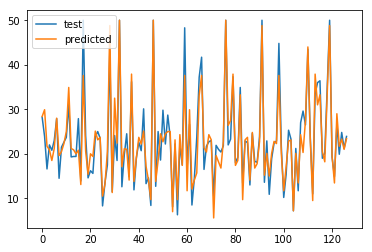

In [241]:
plt.plot(range(len(test_y)), test_y, label='test')
plt.plot(range(len(test_y)), predicted, label='predicted')
plt.legend(loc='best')
plt.show()

In [237]:
print len(predicted), len(test_y)

127 127


Нарисуем отнормированную разность

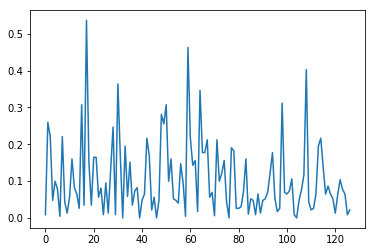

In [238]:
plt.plot(range(len(test_y)), abs(test_y - predicted)/np.mean(test_y), label='test - predicted')
plt.show()

Ограничим глубину дерева

In [247]:
Tree2 = DecisionTree(10)

plt.plot(range(len(test_y)), test_y, label='test')
plt.plot(range(len(test_y)), Tree2.predict(test_data), label='predicted')
plt.legend(loc='best')
plt.show()

IndexError: list index out of range

In [ ]:
mse_depth = []
shift = 10

for i in range(20):
    Tree_i = DecisionTree(i + shift)
    print Tree_i.max_depth
    predicted_i = Tree_i.predict(test_data)
    mse_depth.append(func_mse(test_y, predicted_i))

plt.plot(range(len(mse_depth)) + shift, Tree1.predict(test_data), label='mse')
plt.legend(loc='best')
plt.show()